In [1]:
import sys
sys.path.append("/cluster/home/yhgong/")

import matplotlib.pyplot as plt

from python.modules import *
plt.style.use('default')

In [2]:
simPath: str = "/lfs/data/yhgong/productionRun/single/HD/Cooling_Feedback_ContiRandom15"

### Turbulence Heating

In [3]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.TurbulenceHeating,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=TurbulenceHeatingTimeSeriesCalculationInfoModel(
            tStartMyr=2800,
            tEndMyr=3300,
            tStepMyr=200,
            rKpc=100,
            shape=Shape.Box,
            rhoIndex=0
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-05 08:47:12,874 Particle file found: perseus_merger_hdf5_part_2800
yt : [INFO     ] 2024-05-05 08:47:13,044 Parameters: current_time              = 8.836146925317091e+16
yt : [INFO     ] 2024-05-05 08:47:13,046 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 08:47:13,047 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-05 08:47:13,048 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-05 08:47:13,049 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-05 08:47:29,878 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-05 08:47:30,053 Parameters: current_time              = 9.467188058008539e+16
yt : [INFO     ] 2024-05-05 08:47:30,054 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 08:47:30,056 Parameters: domain_left_edge          = [-1.23424e+25 -

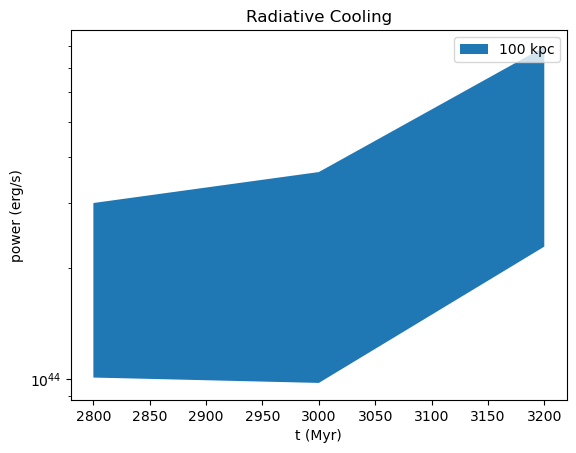

In [4]:
fig, ax = plt.subplots()

ax.fill_between(result.x, result.value.upperLimit, result.value.lowerLimit, \
    label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### Jet Heating

In [5]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.JetPower,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
            tStartMyr=20,
            tEndMyr=3300
        )
    ) \
    .getData()

In [6]:
resultAvg = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.JetPower,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
            tStartMyr=20,
            tEndMyr=3300,
            smoothingMyr=20
        )
    ) \
    .getData()

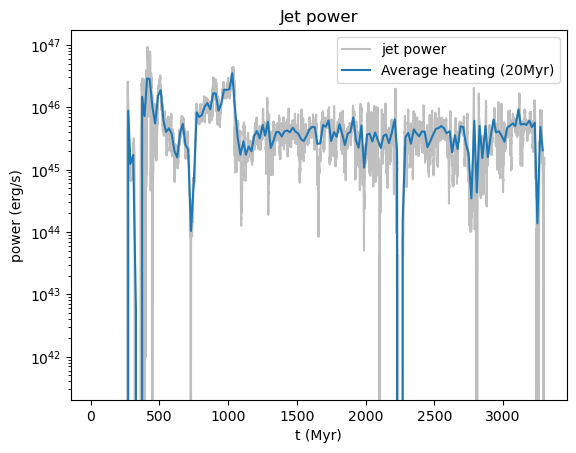

In [7]:
fig, ax = plt.subplots()
ax.plot(result.x, result.value, label=f"jet power", \
        color="gray", alpha=0.5)
ax.plot(resultAvg.x, resultAvg.value, \
        label="Average heating (20Myr)")
ax.set_title("Jet power")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### Radiative Cooling

In [9]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=GasPropertyTimeSeriesCalculationInfoModel(
            tStartMyr=2800,
            tEndMyr=3300,
            tStepMyr=200,
            rKpc=100,
            shape=Shape.Box,
            gasProperty=GasField.Luminosity
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-05 08:49:30,488 Particle file found: perseus_merger_hdf5_part_2800
yt : [INFO     ] 2024-05-05 08:49:30,561 Parameters: current_time              = 8.836146925317091e+16
yt : [INFO     ] 2024-05-05 08:49:30,562 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 08:49:30,564 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-05 08:49:30,565 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-05 08:49:30,566 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-05 08:49:35,523 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-05 08:49:35,526 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-05 08:49:35,527 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-05 08:49:35,565 Adding ('gas','xray_emissivity_0.5_7.0_keV') fiel

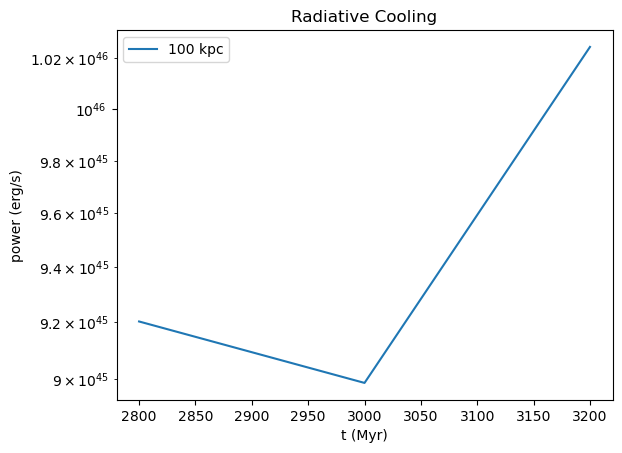

In [10]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()